In [1]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

TAILLE_PLOT = 3000
TAILLE_TCL = 10 ** 6

def showSimulation(simulation):
    rayon = 1
    plt.figure(figsize=(15, 15))
    plt.xlim([-1.05, 1.05])
    plt.ylim([-1.05, 1.05])
    ds = 60
    plt.xticks([-1, 0, 1], [-1, 0, 1], fontsize=3*ds/4)
    plt.yticks([-1, 0, 1], [-1, 0, 1], fontsize=3*ds/4)
    plt.title("$(J_i)_{i \in [\![1, " + str(TAILLE_PLOT) + "]\!]}$", fontsize=ds)
    dedans = np.sqrt(simulation[:, 0] ** 2 + simulation[:, 1] ** 2) < 1
    plt.scatter(*simulation[dedans].T, alpha=0.75, c='black', s=ds**2/20)
    plt.scatter(*simulation[~dedans].T, alpha=0.25, c='gray', s=ds**2/20)
    plt.plot(rayon * np.array([-1, 1, 1, -1, -1]), rayon * np.array([1, 1, -1, -1, 1]), c='k', ls='--')
    x = np.linspace(-1, 1, 200)
    plt.plot(x, np.sqrt(1 - x ** 2), c='k', ls='--')
    plt.plot(x, -np.sqrt(1 - x ** 2), c='k', ls='--')
    plt.scatter(0, 0, c='k', marker='x')
    plt.savefig("images/J_i.png",transparent=True, bbox_inches='tight')
    

def carreUniforme(x):
    return 2 * x - 1


def uniforme(taille):
    return np.random.rand(taille, 2)


def experience(loi, taille):
    simulation = loi(uniforme(taille))
    dedans = np.sqrt(simulation[:, 0] ** 2 + simulation[:, 1] ** 2) < 1
    return 4 * dedans

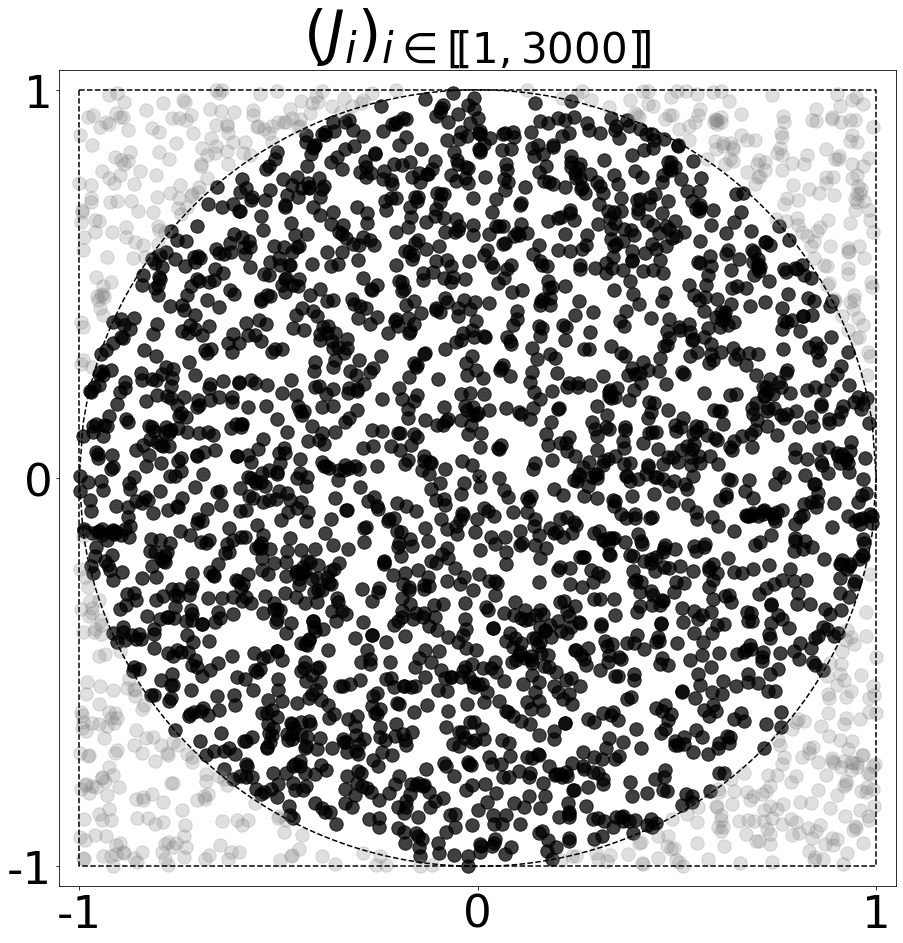

In [2]:
simulation = carreUniforme(uniforme(TAILLE_PLOT))
showSimulation(simulation);

Estimateur de Pi = 3.140304


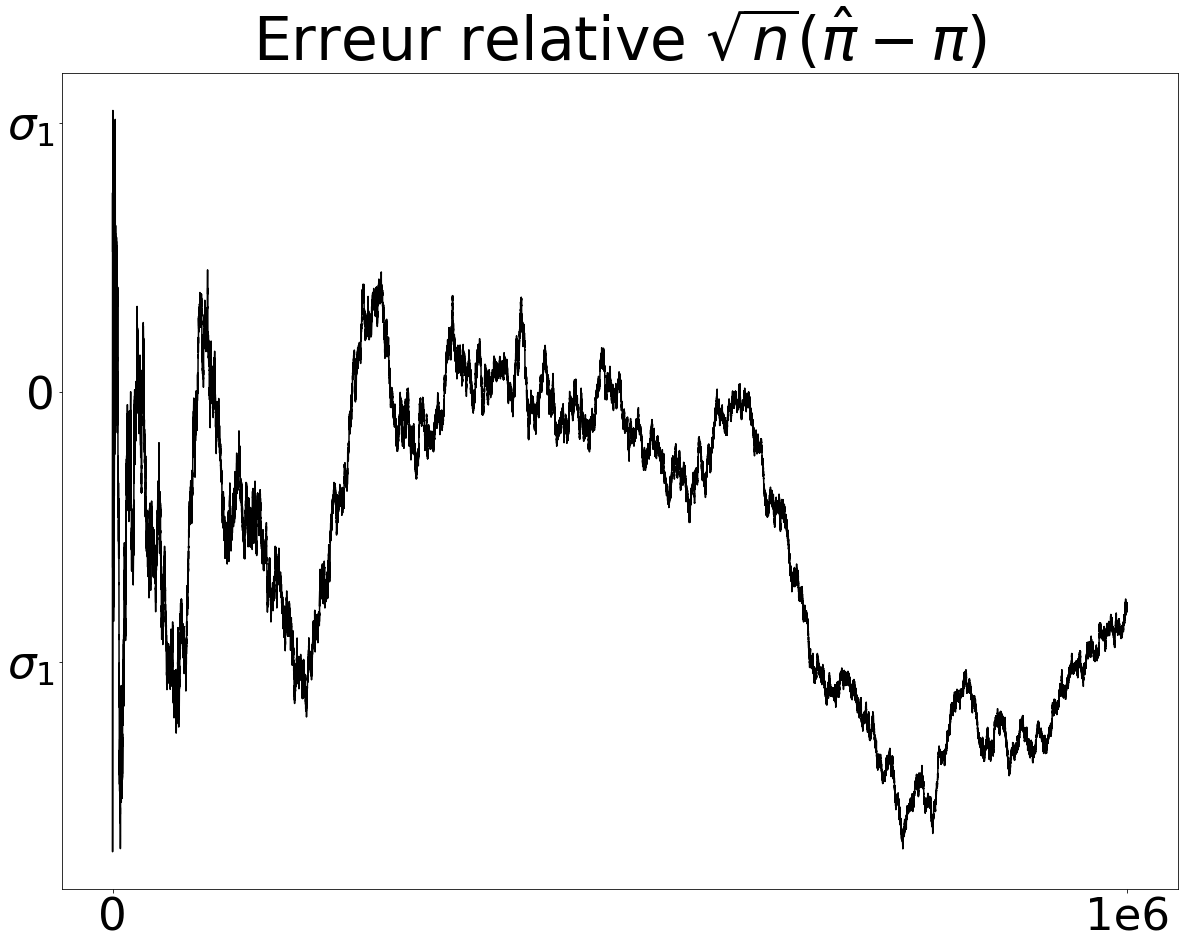

In [3]:
resultat = experience(carreUniforme, TAILLE_TCL)
moyenne = np.cumsum(resultat) / np.arange(1, 1 + TAILLE_TCL)
s1 = np.sqrt((1 - np.pi/4)*np.pi/4)
plt.figure(figsize=(20, 15))
plt.rcParams['axes.facecolor'] = '#FFFFFF00'
ds = 60
plt.xticks([0, 10**6], [0, '1e6'], fontsize=3*ds/4)
plt.yticks([-s1, 0, s1], ['$\sigma_1$', 0, '$\sigma_1$'], fontsize=3*ds/4)
plt.title("Erreur relative $\sqrt{n}(\hat{\pi} - \pi)$", fontsize=ds)
plt.plot(np.sqrt(np.arange(1, 1 + TAILLE_TCL)) * (moyenne - np.pi)/4, color='k')
plt.savefig("images/TCL.png",transparent=True, bbox_inches='tight')
print("Estimateur de Pi =", resultat.sum() / TAILLE_TCL)